In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = sns.load_dataset('iris')

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder
labelencode =LabelEncoder()

df['species'] = labelencode.fit_transform(df['species'])

In [23]:
X = df.drop(['species'],axis =1)
y= df['species']

In [24]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
#train test split
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X ,y ,test_size = 0.30,random_state =42)

In [31]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
tree_model = DecisionTreeClassifier()

In [43]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini = 

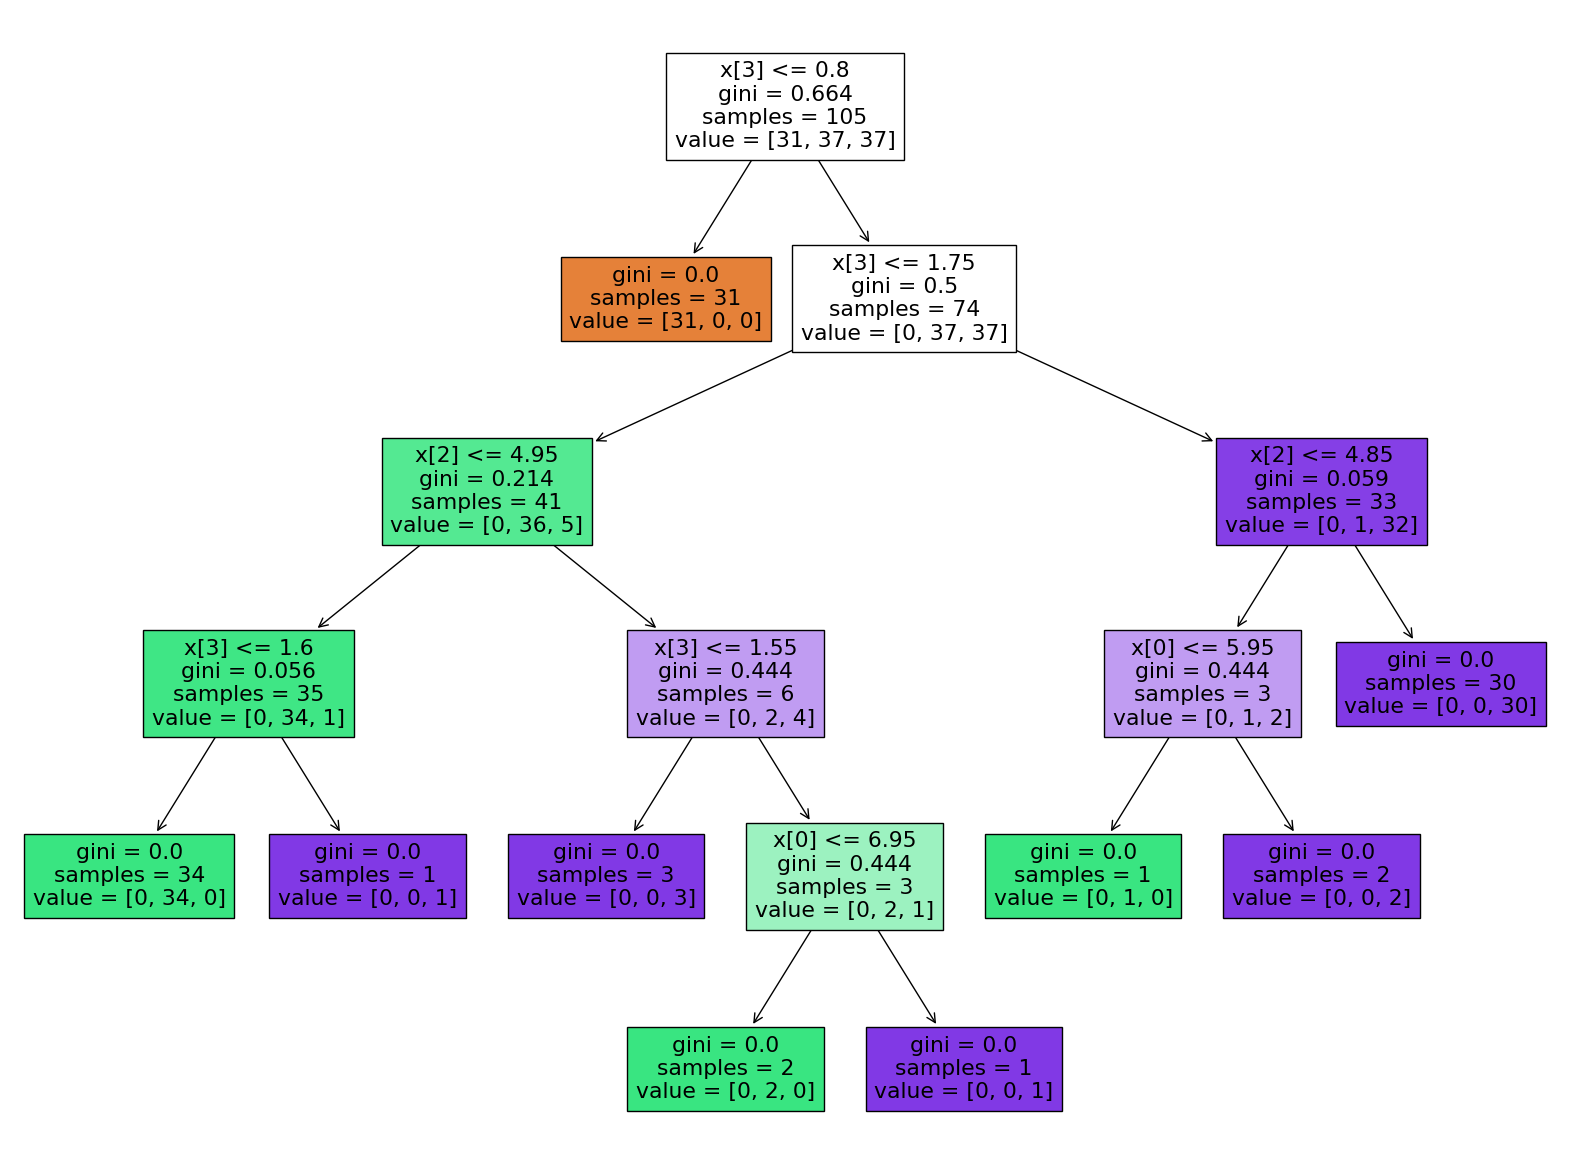

In [44]:
from sklearn import tree
plt.figure(figsize = (20,15))
tree.plot_tree(tree_model,filled =True)

In [45]:
#For test data
tree_model.fit(X_test,y_test)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.65\ngini = 0.655\nsamples = 45\nvalue = [19, 13, 13]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [19, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.85\ngini = 0.5\nsamples = 26\nvalue = [0, 13, 13]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13]')]

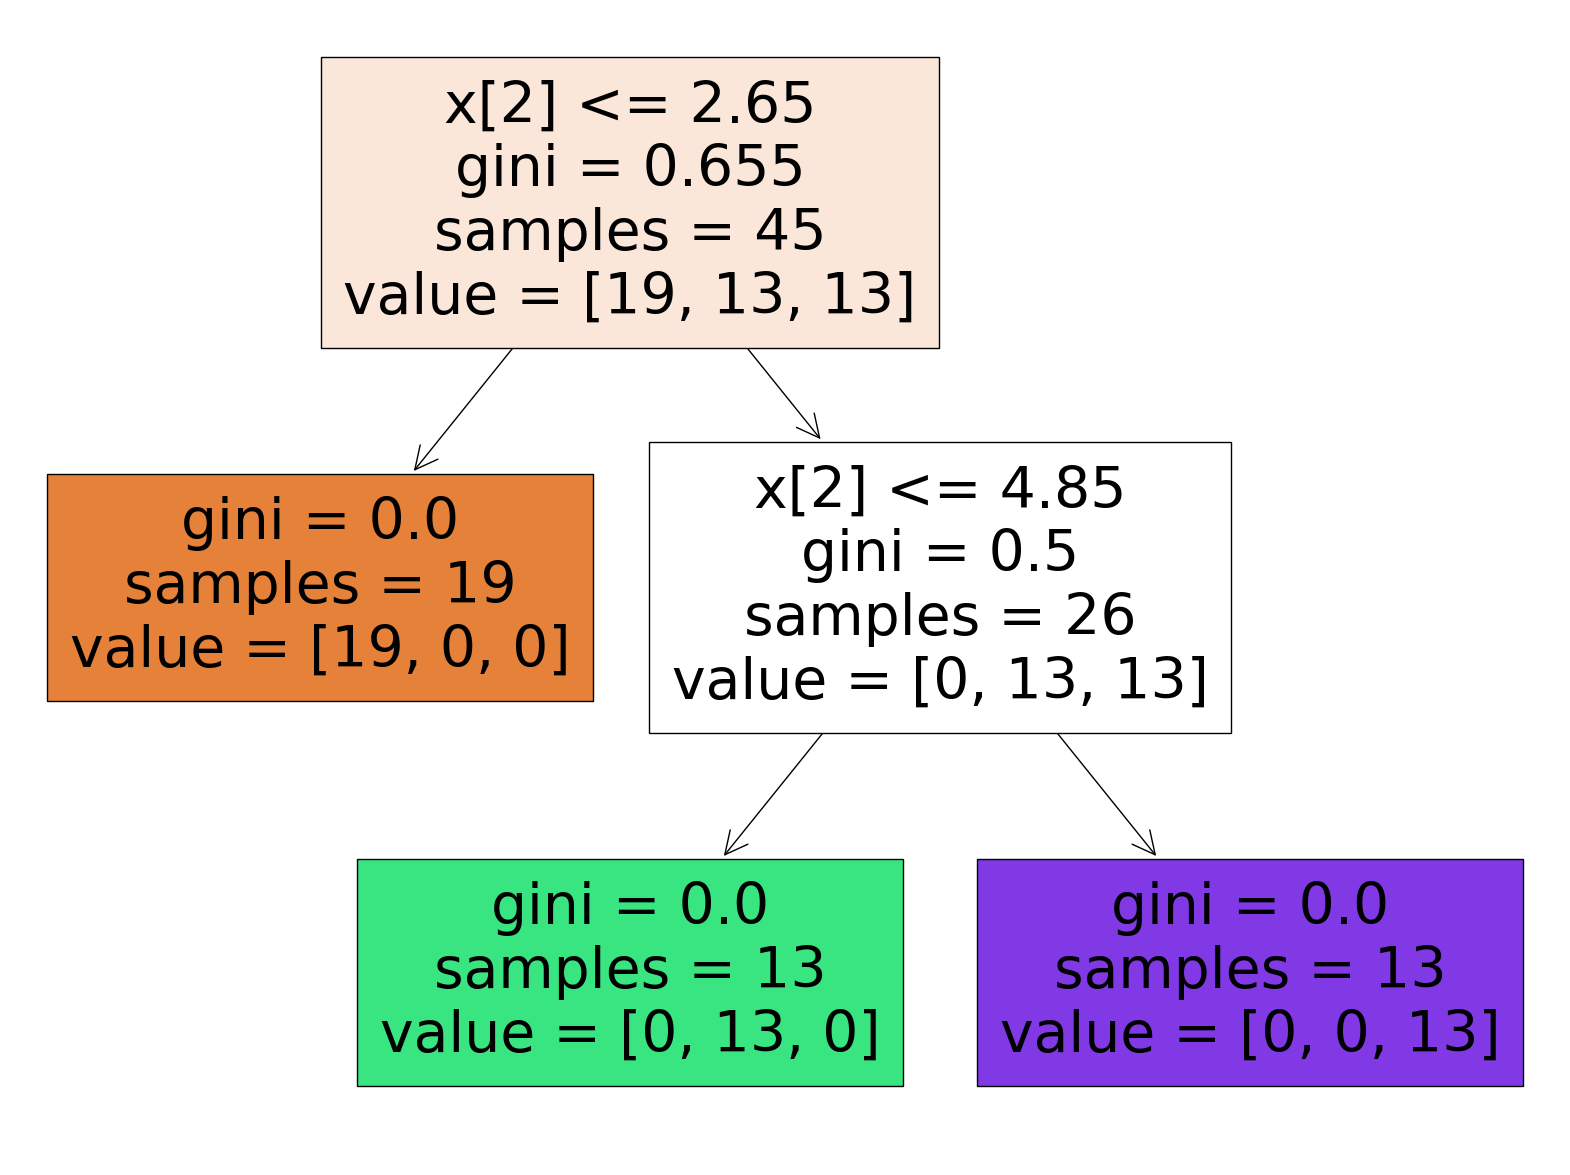

In [46]:
from sklearn import tree
plt.figure(figsize =(20,15))
tree.plot_tree(tree_model,filled =True)

In [67]:
y_predt = tree_model.predict(X_train)

In [68]:
accuracy_score(y_predt,y_train)

0.9333333333333333

In [72]:
print(classification_report(y_predt,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      0.92      0.90        36
           2       0.92      0.89      0.91        38

    accuracy                           0.93       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.93      0.93      0.93       105



In [60]:
y_pred = tree_model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score,classification_report

In [65]:
accuracy_score(y_pred,y_test)

1.0

In [71]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

